In [27]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

- Binary classification each pixel
- Image preprocessing scale [0:1]
- Loss function `binary_crossentropy`
# Model architecture
![unet](u-net-architecture.png)

In [28]:
from tensorflow.keras.layers import  Input, Conv2D,MaxPooling2D,UpSampling2D,Dropout,Dense,concatenate
from tensorflow.keras import Model

In [29]:
input_size = (1024,1024,3)

In [30]:
# decode
inputs =Input(input_size)
# i = 1
conv1 = Conv2D(64,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2))(conv1)
# i = 2
conv2 = Conv2D(128,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2))(conv2)
# i = 3
conv3 = Conv2D(256,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2))(conv3)
# i = 4
conv4 = Conv2D(512,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size = (2,2))(drop4)
# i = 5
conv5 = Conv2D(1024,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)
# i = 5
up6  = UpSampling2D(size = (2,2))(drop5)
up6 = Conv2D(512,2,activation='relu',padding = 'same',kernel_initializer = 'he_normal')(up6)
merge6 = concatenate([drop4,up6],axis = 3)
conv6 = Conv2D(512,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv6)
# i = 4
up7 = Conv2D(256,1,activation='relu',padding = 'same',kernel_initializer = 'he_normal')\
    (UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7],axis = 3)
conv7 = Conv2D(256,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv7)
# i = 3
up8 = Conv2D(128,2,activation='relu',padding = 'same',kernel_initializer = 'he_normal')\
    (UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8],axis = 3)
conv8 = Conv2D(128,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv8)
# i = 2
up9 = Conv2D(64,2,activation='relu',padding = 'same',kernel_initializer = 'he_normal')\
    (UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9],axis = 3)
conv9 = Conv2D(64,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(64,3,activation = 'relu',padding = 'same',kernel_initializer = 'he_normal')(conv9)
conv10 = Conv2D(1,1,activation='sigmoid')(conv9)

model = Model(inputs  =inputs,outputs = conv10)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 1024, 1024, 6 1792        input_19[0][0]                   
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 1024, 1024, 6 36928       conv2d_188[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_64 (MaxPooling2D) (None, 512, 512, 64) 0           conv2d_189[0][0]                 
____________________________________________________________________________________________

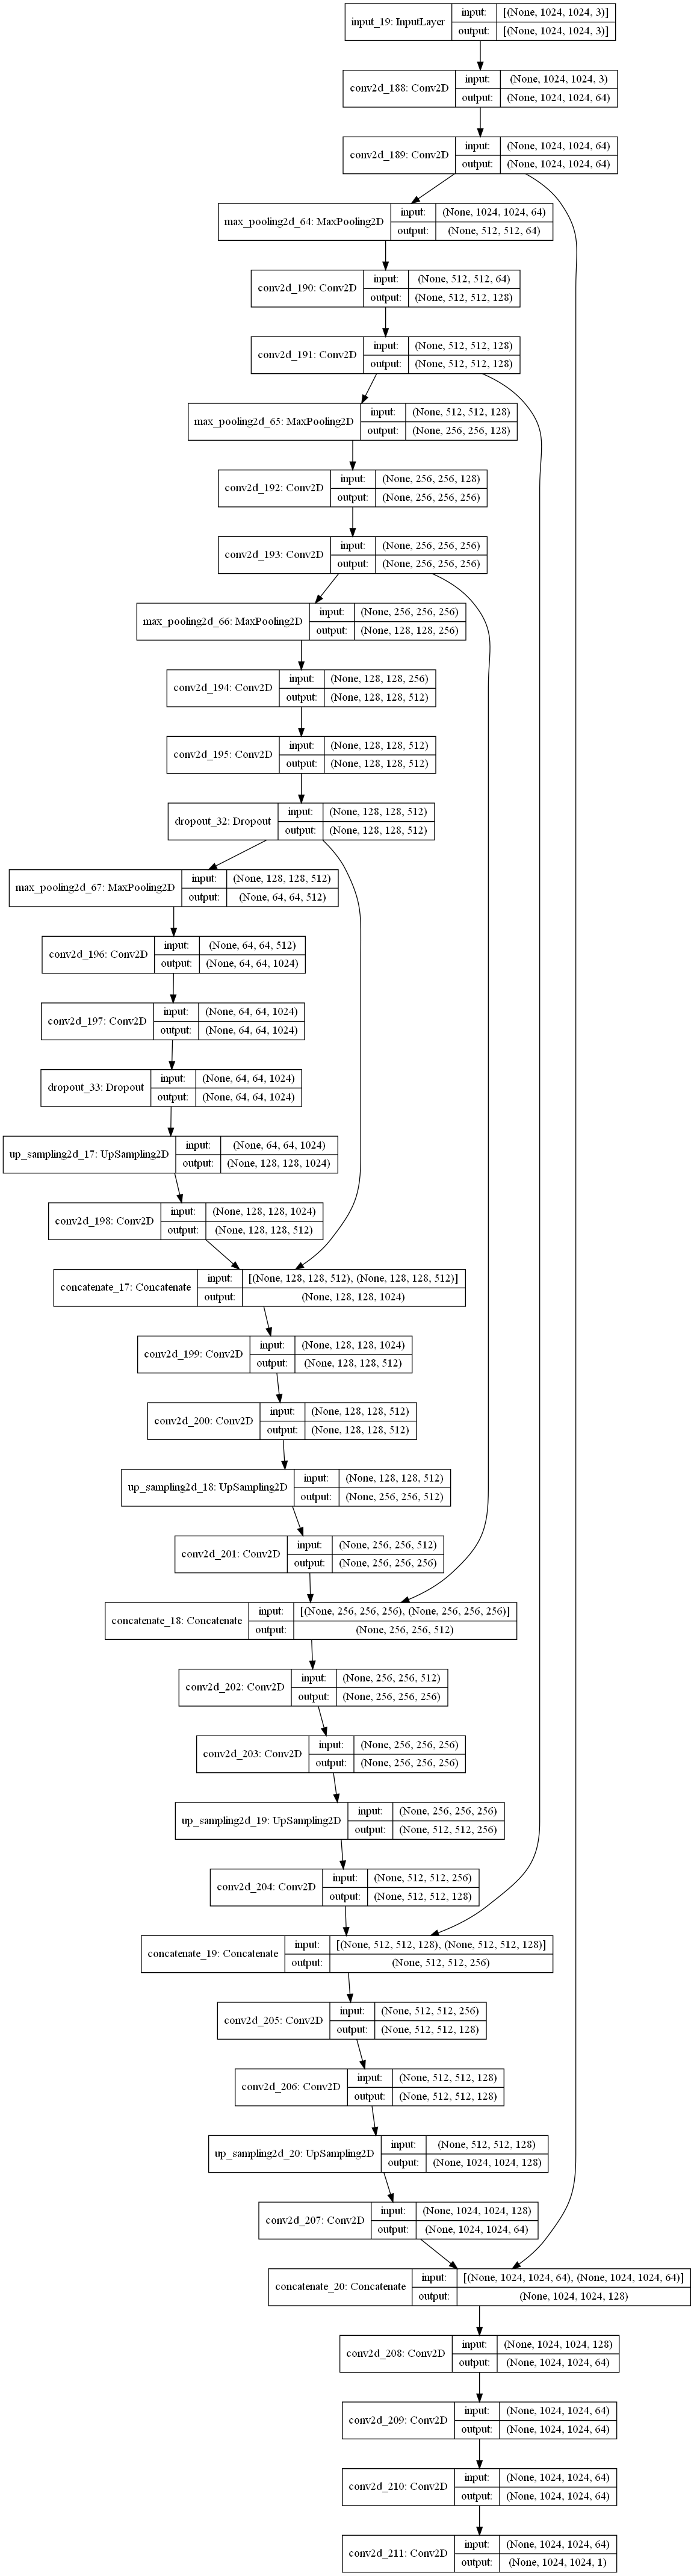

In [32]:
tf.keras.utils.plot_model(model,show_shapes= True)

In [34]:
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),
              metrics = ['accuracy'])

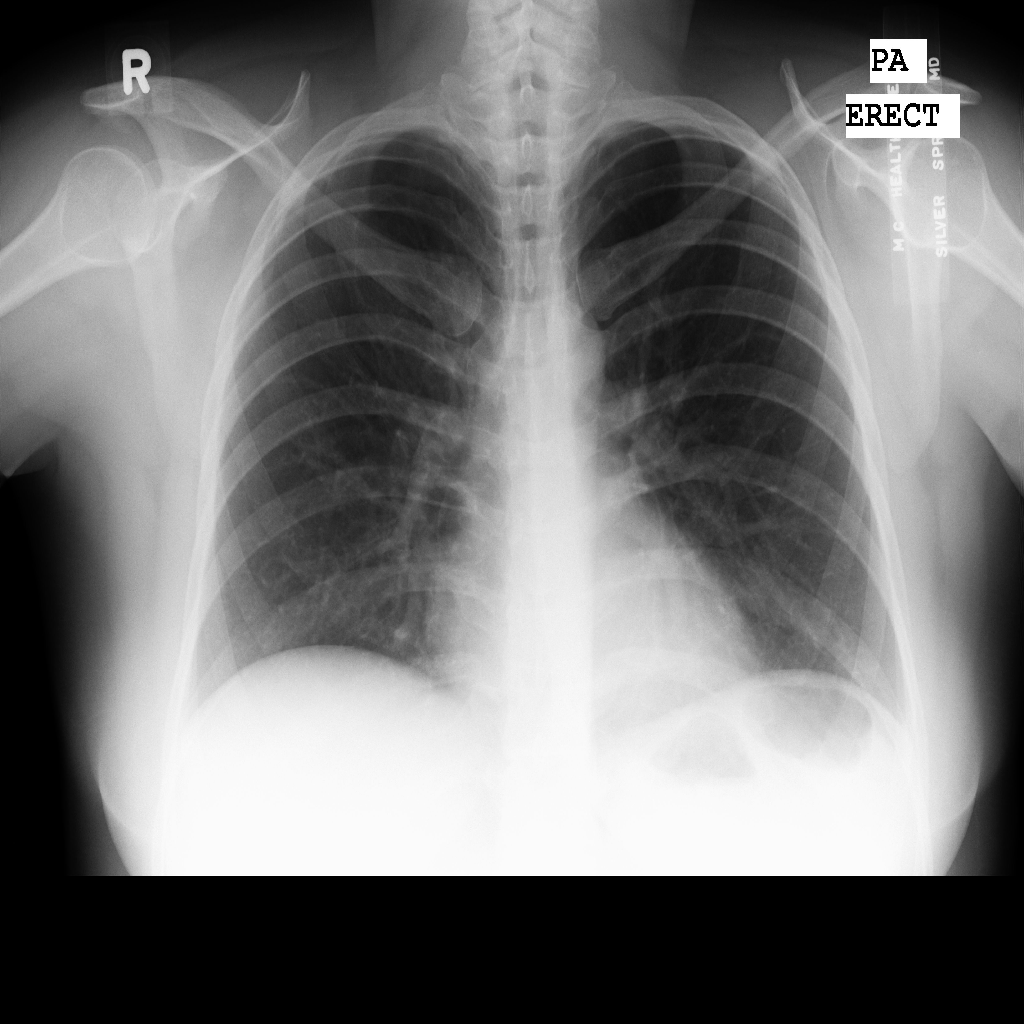

In [50]:
# Load image
img = tf.keras.preprocessing.image.load_img('NLM-MontgomeryCXRSet\MontgomerySet\CXR_png\MCUCXR_0001_0.png',
                                      target_size = (1024,1024))
img

In [52]:
# Convert and scaling model
image_array = tf.keras.preprocessing.image.img_to_array(img)
image_array = np.expand_dims(image_array,axis =0)
print(image_array.shape)
image_array = image_array/255 

(1, 1024, 1024, 3)


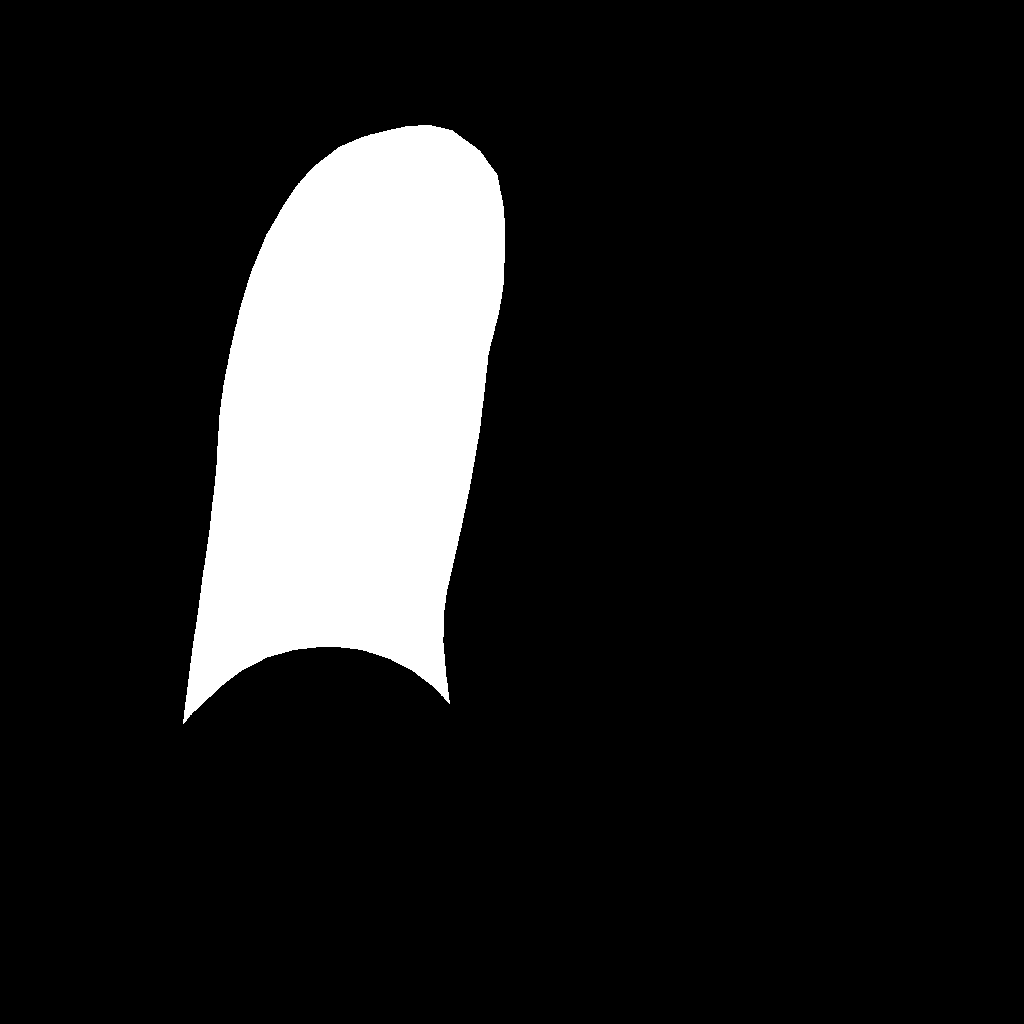

In [47]:
mask = tf.keras.preprocessing.image.load_img('NLM-MontgomeryCXRSet\MontgomerySet\ManualMask\leftMask\MCUCXR_0001_0.png',
                                      target_size = (1024,1024))
mask

In [53]:
# Convert and scaling mask
mask_array = tf.keras.preprocessing.image.img_to_array(mask)
mask_array = np.expand_dims(mask_array,axis =0)
print(mask_array.shape)
mask_array = mask_array/255 

(1, 1024, 1024, 3)


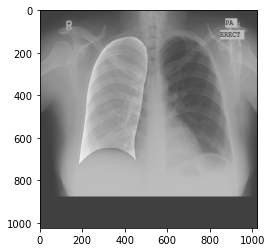

In [56]:
plt.imshow(mask_array[0],alpha=0.5)
plt.imshow(image_array[0],alpha=0.5)